In [1]:
# pip install pandas

In [2]:
# !pip install scikit-learn

In [3]:
# pip install numpy

In [4]:
# pip install os

In [5]:
# %pip install streamlit

In [6]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
%matplotlib inline

In [8]:
# discount price, remove recommended requirements, 

In [9]:
# Ask user for game name, game type, popular tags, genre, developer & publisher if you want.

In [10]:
# barplot for original_price, barplot for achievements, most popular publishers, most popular types of games, games release dates, review plot

In [11]:
# Load only first 1000 rows for testing
df = pd.read_csv("steam_games.csv", low_memory=False)

df['name_lower'] = df['name'].str.lower().str.strip()

df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,...,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,name_lower
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...",...,"English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99,doom
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...",...,"English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN,playerunknown's battlegrounds
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",...,"English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN,battletech
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",...,"English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN,dayz
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...",...,"English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN,eve online


In [12]:
#pip install matplotlib seaborn pandas

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [14]:
def plot_original_price(df):
    plt.figure(figsize=(10,6))
    sns.histplot(df["original_price"].dropna(), bins=30)
    plt.title("Distribution of Original Price")
    plt.xlabel("Price ($)")
    plt.ylabel("Count")
    plt.show()

In [15]:
def plot_achievements(df):
    plt.figure(figsize=(10,6))
    sns.histplot(df["achievements"].dropna(), bins=30)
    plt.title("Distribution of Achievements")
    plt.xlabel("Number of Achievements")
    plt.ylabel("Count")
    plt.show()

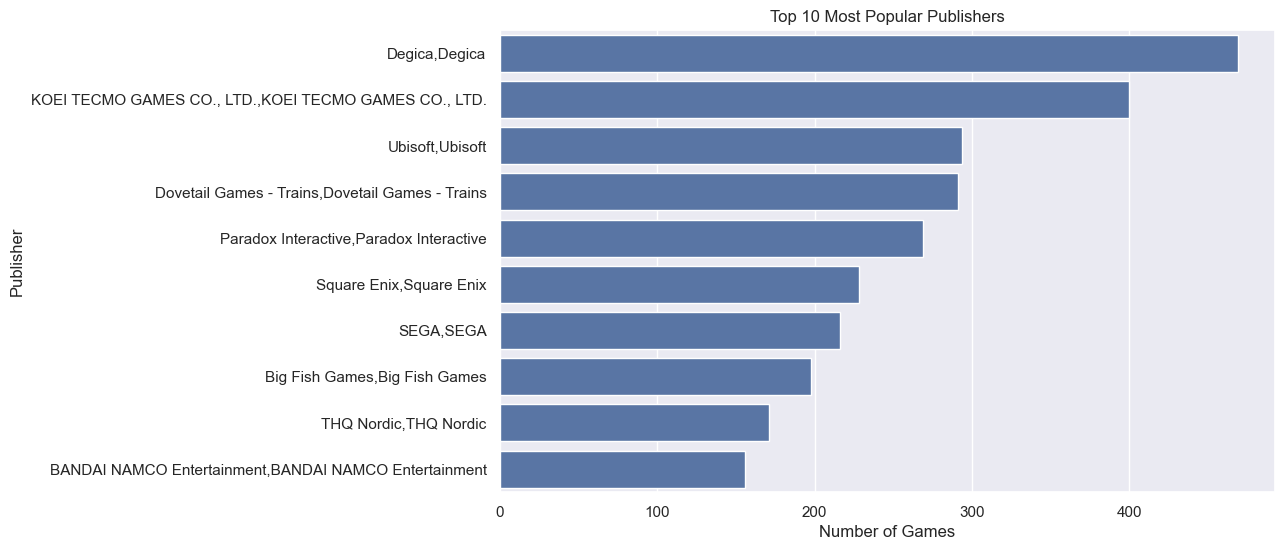

In [16]:
plt.figure(figsize=(10,6))
top = df["publisher"].value_counts().head(10)
sns.barplot(x=top.values, y=top.index)
plt.title("Top 10 Most Popular Publishers")
plt.xlabel("Number of Games")
plt.ylabel("Publisher")
plt.show()

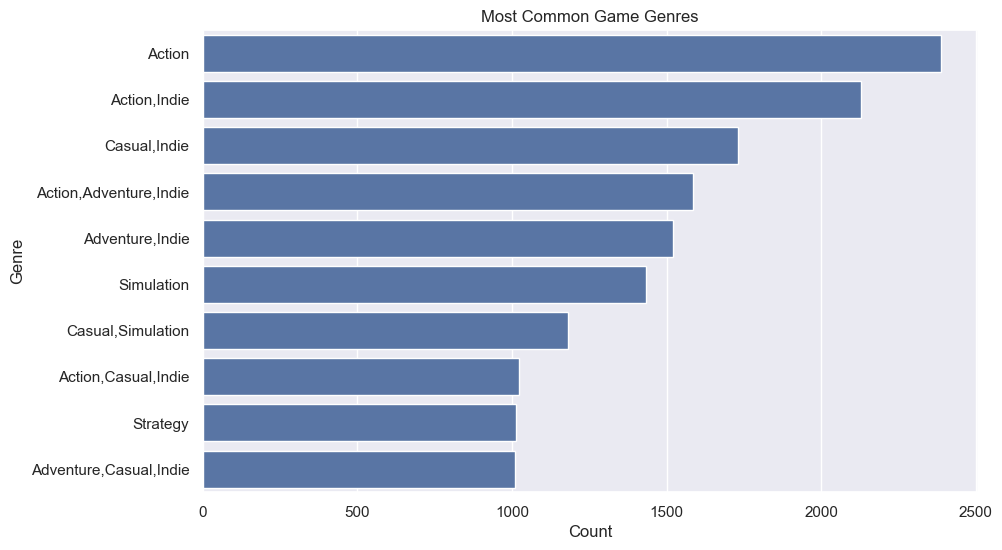

In [17]:

plt.figure(figsize=(10,6))
df["genre"] = df["genre"].str.split(", ")
exploded = df.explode("genre")
top = exploded["genre"].value_counts().head(10)

sns.barplot(x=top.values, y=top.index)
plt.title("Most Common Game Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [18]:
cols_to_clean = [
    "desc_snippet",
    "minimum_requirements",
    "original_price",
    "popular_tags"
]

for col in cols_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r"\.\.\.", "", regex=True).str.strip()

In [19]:
# Load user-added games
if os.path.exists("user_games.csv"):
    df_user = pd.read_csv("user_games.csv")
else:
    df_user = pd.DataFrame(columns=df.columns)

# Merge into main dataframe
df = pd.concat([df, df_user], ignore_index=True)

In [20]:
df["name_lower"] = df["name"].str.lower().str.strip()

In [21]:
df.shape

(40835, 25)

In [22]:
len(df['publisher'].unique())

15291

In [23]:
df.loc[7, 'all_reviews']
# Get Very Positive, and the % number

'Very Positive,(23,763),- 91% of the 23,763 user reviews for this game are positive.'

In [24]:
# selecting columns to keep for either printing or similarity factor

columns_to_keep = [
    "name",
    "all_reviews",
    "popular_tags",
    "name_lower",
    "genre",
    "developer",
    "publisher",
    "desc_snippet",
    "minimum_requirements",
    "original_price"
]

df = df[columns_to_keep].copy()
df.head()

,name,all_reviews,popular_tags,name_lower,genre,developer,publisher,desc_snippet,minimum_requirements,original_price
0,DOOM,"Very Positive,(42,550),- 92% of the 42,550 use...","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...",doom,[Action],id Software,"Bethesda Softworks,Bethesda Softworks",Now includes all three premium DLC packs (Unto...,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...",$19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(836,608),- 49% of the 836,608 user revi...","Survival,Shooter,Multiplayer,Battle Royale,PvP...",playerunknown's battlegrounds,"[Action,Adventure,Massively Multiplayer]",PUBG Corporation,"PUBG Corporation,PUBG Corporation",PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Minimum:,Requires a 64-bit processor and opera...",$29.99
2,BATTLETECH,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",battletech,"[Action,Adventure,Strategy]",Harebrained Schemes,"Paradox Interactive,Paradox Interactive",Take command of your own mercenary outfit of '...,"Minimum:,Requires a 64-bit processor and opera...",$39.99
3,DayZ,"Mixed,(167,115),- 61% of the 167,115 user revi...","Survival,Zombies,Open World,Multiplayer,PvP,Ma...",dayz,"[Action,Adventure,Massively Multiplayer]",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive",The post-soviet country of Chernarus is struck...,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...",$44.99
4,EVE Online,"Mostly Positive,(11,481),- 74% of the 11,481 u...","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...",eve online,"[Action,Free to Play,Massively Multiplayer,RPG...",CCP,"CCP,CCP",EVE Online is a community-driven spaceship MMO...,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...",Free


In [25]:
# Clean tag formatting: remove brackets/quotes/spaces and split into list
df["popular_tags"] = (
    df["popular_tags"]
    .astype(str)
    .str.replace(r"[\[\]'\" ]", "", regex=True)
    .str.split(",")
)

In [26]:
df["genre"] = df["genre"].fillna(
    df["popular_tags"].apply(lambda tags: tags[0] if isinstance(tags, list) and len(tags) > 0 else None)
)

In [27]:
df = df[df["name"].notna()]
df = df[df["popular_tags"].astype(str) != "[]"]
df.head()

,name,all_reviews,popular_tags,name_lower,genre,developer,publisher,desc_snippet,minimum_requirements,original_price
0,DOOM,"Very Positive,(42,550),- 92% of the 42,550 use...","[FPS, Gore, Action, Demons, Shooter, First-Per...",doom,[Action],id Software,"Bethesda Softworks,Bethesda Softworks",Now includes all three premium DLC packs (Unto...,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...",$19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(836,608),- 49% of the 836,608 user revi...","[Survival, Shooter, Multiplayer, BattleRoyale,...",playerunknown's battlegrounds,"[Action,Adventure,Massively Multiplayer]",PUBG Corporation,"PUBG Corporation,PUBG Corporation",PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Minimum:,Requires a 64-bit processor and opera...",$29.99
2,BATTLETECH,"Mostly Positive,(7,030),- 71% of the 7,030 use...","[Mechs, Strategy, Turn-Based, Turn-BasedTactic...",battletech,"[Action,Adventure,Strategy]",Harebrained Schemes,"Paradox Interactive,Paradox Interactive",Take command of your own mercenary outfit of '...,"Minimum:,Requires a 64-bit processor and opera...",$39.99
3,DayZ,"Mixed,(167,115),- 61% of the 167,115 user revi...","[Survival, Zombies, OpenWorld, Multiplayer, Pv...",dayz,"[Action,Adventure,Massively Multiplayer]",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive",The post-soviet country of Chernarus is struck...,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...",$44.99
4,EVE Online,"Mostly Positive,(11,481),- 74% of the 11,481 u...","[Space, MassivelyMultiplayer, Sci-fi, Sandbox,...",eve online,"[Action,Free to Play,Massively Multiplayer,RPG...",CCP,"CCP,CCP",EVE Online is a community-driven spaceship MMO...,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...",Free


In [28]:
def extract_sentiment_and_percentage(df, column_name):
    """Compact version using str.extract()"""
    
    # Extract sentiment (everything before first comma)
    df['sentiment'] = df[column_name].str.extract(r'^([^,]+)', expand=False).str.strip()
    
    # Extract percentage (digits before %)
    df['percentage'] = df[column_name].str.extract(r'(\d+)%', expand=False).astype('Int64')
    
    return df

extract_sentiment_and_percentage(df, 'all_reviews')
df.head()

,name,all_reviews,popular_tags,name_lower,genre,developer,publisher,desc_snippet,minimum_requirements,original_price,sentiment,percentage
0,DOOM,"Very Positive,(42,550),- 92% of the 42,550 use...","[FPS, Gore, Action, Demons, Shooter, First-Per...",doom,[Action],id Software,"Bethesda Softworks,Bethesda Softworks",Now includes all three premium DLC packs (Unto...,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...",$19.99,Very Positive,92
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(836,608),- 49% of the 836,608 user revi...","[Survival, Shooter, Multiplayer, BattleRoyale,...",playerunknown's battlegrounds,"[Action,Adventure,Massively Multiplayer]",PUBG Corporation,"PUBG Corporation,PUBG Corporation",PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Minimum:,Requires a 64-bit processor and opera...",$29.99,Mixed,49
2,BATTLETECH,"Mostly Positive,(7,030),- 71% of the 7,030 use...","[Mechs, Strategy, Turn-Based, Turn-BasedTactic...",battletech,"[Action,Adventure,Strategy]",Harebrained Schemes,"Paradox Interactive,Paradox Interactive",Take command of your own mercenary outfit of '...,"Minimum:,Requires a 64-bit processor and opera...",$39.99,Mostly Positive,71
3,DayZ,"Mixed,(167,115),- 61% of the 167,115 user revi...","[Survival, Zombies, OpenWorld, Multiplayer, Pv...",dayz,"[Action,Adventure,Massively Multiplayer]",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive",The post-soviet country of Chernarus is struck...,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...",$44.99,Mixed,61
4,EVE Online,"Mostly Positive,(11,481),- 74% of the 11,481 u...","[Space, MassivelyMultiplayer, Sci-fi, Sandbox,...",eve online,"[Action,Free to Play,Massively Multiplayer,RPG...",CCP,"CCP,CCP",EVE Online is a community-driven spaceship MMO...,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...",Free,Mostly Positive,74


In [29]:
df = df.drop(columns=["all_reviews"])
df.head()

,name,popular_tags,name_lower,genre,developer,publisher,desc_snippet,minimum_requirements,original_price,sentiment,percentage
0,DOOM,"[FPS, Gore, Action, Demons, Shooter, First-Per...",doom,[Action],id Software,"Bethesda Softworks,Bethesda Softworks",Now includes all three premium DLC packs (Unto...,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...",$19.99,Very Positive,92
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"[Survival, Shooter, Multiplayer, BattleRoyale,...",playerunknown's battlegrounds,"[Action,Adventure,Massively Multiplayer]",PUBG Corporation,"PUBG Corporation,PUBG Corporation",PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Minimum:,Requires a 64-bit processor and opera...",$29.99,Mixed,49
2,BATTLETECH,"[Mechs, Strategy, Turn-Based, Turn-BasedTactic...",battletech,"[Action,Adventure,Strategy]",Harebrained Schemes,"Paradox Interactive,Paradox Interactive",Take command of your own mercenary outfit of '...,"Minimum:,Requires a 64-bit processor and opera...",$39.99,Mostly Positive,71
3,DayZ,"[Survival, Zombies, OpenWorld, Multiplayer, Pv...",dayz,"[Action,Adventure,Massively Multiplayer]",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive",The post-soviet country of Chernarus is struck...,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...",$44.99,Mixed,61
4,EVE Online,"[Space, MassivelyMultiplayer, Sci-fi, Sandbox,...",eve online,"[Action,Free to Play,Massively Multiplayer,RPG...",CCP,"CCP,CCP",EVE Online is a community-driven spaceship MMO...,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...",Free,Mostly Positive,74


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40819 entries, 0 to 40834
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  40819 non-null  object
 1   popular_tags          40819 non-null  object
 2   name_lower            40819 non-null  object
 3   genre                 40819 non-null  object
 4   developer             40492 non-null  object
 5   publisher             35732 non-null  object
 6   desc_snippet          40817 non-null  object
 7   minimum_requirements  40817 non-null  object
 8   original_price        40817 non-null  object
 9   sentiment             28470 non-null  object
 10  percentage            17363 non-null  Int64 
dtypes: Int64(1), object(10)
memory usage: 3.8+ MB


In [31]:
# pip install regex

# TF-IDF Vectorizer, fit_transform, cosine_similarity

### Build the recommender system function off of cosine_similarity, ask for only important columns for user the combine and use similarity to find similar games

In [32]:
import re

def clean_tags(tag_list):
    """
    Convert list-like string ['FPS','CoOp','MilitaryShooter']
    into clean, spaced tokens: 'fps coop military shooter'
    """
    if not isinstance(tag_list, str):
        return ""

    # Remove brackets and quotes
    tag_list = tag_list.replace("[", "").replace("]", "").replace("'", "").replace('"', "")

    # Split by comma
    tags = [t.strip() for t in tag_list.split(",")]

    clean_tokens = []
    for tag in tags:
        # Split CamelCase (e.g., MilitaryShooter → Military Shooter)
        separated = re.sub(r'(?<!^)(?=[A-Z])', ' ', tag)
        clean_tokens.append(separated.lower())

    return " ".join(clean_tokens)

In [33]:
#df["clean_tags"] = df["popular_tags"].apply(clean_tags)

In [34]:
# Build the feature text used for similarity
#df["Feature_Text"] = (
 #   df["genre"].astype(str) + " " +
#    df["developer"].astype(str) + " " +
#    df["popular_tags"].astype(str)
#)

# Build TF-IDF matrix (correct, accurate method)
#vectorizer = TfidfVectorizer(stop_words="english")
#feature_matrix = vectorizer.fit_transform(df["Feature_Text"])


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#vectorizer = TfidfVectorizer(stop_words="english")

#feature_matrix = vectorizer.fit_transform(df["Feature_Text"])

In [36]:
def rebuild_features(df):
    # Convert tags list → clean string
    #df["clean_tags"] = df["popular_tags"].apply(
    #    lambda x: " ".join(x) if isinstance(x, list) else str(x)
    #)

    df["clean_tags"] = df["popular_tags"].apply(
        lambda x: clean_tags(" ".join(x).lower()) if isinstance(x, list) else clean_tags(str(x).lower())
    )

    #df["clean_tags"] = df["popular_tags"].apply(clean_tags)

    # Weighted feature combination 
    df["Feature_Text"] = (
        df["genre"].fillna("").astype(str) + " " +
        #df["developer"].fillna("").astype(str) + " " +
        (df["clean_tags"].fillna("").astype(str) + " ") * 3
    )

    vectorizer = TfidfVectorizer(
        stop_words="english",
        lowercase=True,
        ngram_range=(1, 1),
        min_df=2
    )

    feature_matrix = vectorizer.fit_transform(df["Feature_Text"])

    return df, vectorizer, feature_matrix

In [37]:
#rebuild_features(df)

In [38]:
def same_franchise(title1, title2):
    import re

    t1 = title1.lower().strip()
    t2 = title2.lower().strip()

    # Remove ALL non-alphanumeric characters
    t1 = re.sub(r'[^a-z0-9\s]', ' ', t1)
    t2 = re.sub(r'[^a-z0-9\s]', ' ', t2)

    # Tokenize meaningful words
    words1 = [w for w in t1.split() if len(w) > 2]
    words2 = [w for w in t2.split() if len(w) > 2]

    if len(words1) < 2 or len(words2) < 2:
        return False

    prefix1 = " ".join(words1[:2])
    prefix2 = " ".join(words2[:2])

    return prefix1 == prefix2

In [39]:
def recommend_game(title, df, df_user, vectorizer, feature_matrix, top_n=5):
    df = df.reset_index(drop=True)
    title_lower = title.lower().strip()
    df["name_lower"] = df["name"].str.lower().str.strip()
    
    df = df.reset_index(drop=True)

    title_lower = title.lower().strip()

    # Ensure lowercase name column
    df["name_lower"] = df["name"].str.lower().str.strip()

    # Look up the game
    match = df[df["name_lower"] == title_lower]

    # ---------------------------------------------------------------
    # CASE 1: Game not found → ask user + add to dataset
    # ---------------------------------------------------------------
    if match.empty:
        print("❌ Game not found in dataset. Let's add it!\n")

        genre = input("Genre: ").strip()
        developer = input("Developer: ").strip()
        tags = input("Popular tags (comma-separated): ").strip()

        # clean tags
        raw_tags = [t.strip() for t in tags.split(",")]
        cleaned_tags = [t.lower().replace(" ", "").replace("-", "") for t in raw_tags]

        # build feature text ON THE FLY (do NOT add to df)
        feature_text = " ".join(cleaned_tags)

        # transform into vector
        new_vec = vectorizer.transform([feature_text]) 
        
        sims = cosine_similarity(new_vec, feature_matrix)[0]

        # quality weighting (if you want)
        sims = sims * (df["percentage"].fillna(70) / 100)

        # sort and pick top 5
        ranked_idx = sims.argsort()[::-1][:5]

        print(f"\n🎮 Games similar to '{title}':\n")
        for i in ranked_idx:
            print(f"- {df.iloc[i]['name']}")
            print(f"    Genre: {df.iloc[i]['genre']}")
            print(f"    Developer: {df.iloc[i]['developer']}")
            print()
        
    
        # build clean_tags from the user's tags
        clean_text = clean_tags(str(cleaned_tags))

        # append to df_user
        df_user.loc[len(df_user)] = {
            "name": title,
            "name_lower": title_lower,
            "genre": genre,
            "developer": developer,
            "popular_tags": cleaned_tags,
            "clean_tags": clean_text,
            "sentiment": "No reviews",
            "percentage": None,
            "original_price": ""
        }

        df_user.to_csv("user_games.csv", index=False)

        # update the outer df_user
        return df_user


    # ---------------------------------------------------------------
    # CASE 2: Game is in dataset → compute similarities
    # ---------------------------------------------------------------
    idx = df.index[df["name_lower"] == title_lower][0]

    sims = cosine_similarity(feature_matrix[idx], feature_matrix)[0]
    quality_weight = df["percentage"].fillna(70) / 100
    sims = sims * quality_weight


    # Set ultra-low similarities to zero to remove noise
    sims[sims < 0.02] = 0

    ranked = sims.argsort()[::-1]

    

    results = []
    seen = set()

    # Prepare tag sets for quality filtering
    target_tags = set(df.iloc[idx]["clean_tags"].split())

    user_games_set = set(df_user["name_lower"].dropna().tolist())
    target_is_user_added = title_lower in user_games_set


    # Identify if target is a AAA shooter (CoD-type)
    target_is_shooter = (
        "shooter" in target_tags or 
        "fps" in target_tags or
        "first-person" in target_tags
    )

    for i in ranked:
        if i == idx:
            continue

        # skip if similarity was wiped out
        if sims[i] == 0:
            continue

        candidate = df.iloc[i]
        candidate_tags = set(candidate["clean_tags"].split())

        is_user_added = candidate["name_lower"] in user_games_set

        if is_user_added:
            continue

        # ---------------------------------------------------------------
        # A. Skip if NO shared tags at all (prevents irrelevant garbage)
        # ---------------------------------------------------------------
        if len(target_tags & candidate_tags) == 0:
            continue

        # ---------------------------------------------------------------
        # REVIEW FILTER — ONLY apply this when TARGET is a Steam game
        # ---------------------------------------------------------------
        if not target_is_user_added:
            # If candidate is from Steam dataset, apply review filter
            if not is_user_added:
                if (
                    candidate["sentiment"] in (None, "", "No reviews")
                    or pd.isna(candidate["percentage"])
                ):
                    continue

        # ---------------------------------------------------------------
        # B. Skip same franchise titles (your original rule)
        # ---------------------------------------------------------------
        if same_franchise(title, candidate["name"]):
            continue

        # ---------------------------------------------------------------
        # C. AAA shooter → avoid low-quality indie shooters
        # ---------------------------------------------------------------
        if target_is_shooter:
            # If it’s free-to-play, mixed reviews, OR < 60% → skip
            if (
                ("indie" in candidate_tags and "free" in str(candidate["original_price"]).lower())
                or (candidate["sentiment"] == "Mixed")
                or (pd.notna(candidate["percentage"]) and candidate["percentage"] < 60)
            ):
                continue

        # ---------------------------------------------------------------
        # D. Avoid duplicates (your rule)
        # ---------------------------------------------------------------
        if candidate["name"] in seen:
            continue

        # Passed all filters → add to results
        results.append(i)
        seen.add(candidate["name"])

        if len(results) == top_n:
            break


    # ---------------------------------------------------------------
    # PRINT RESULTS
    # ---------------------------------------------------------------
    print(f"\n🎮 Games similar to '{title}':\n")

    for i in results:
        row = df.iloc[i]

        genre_val = row["genre"]
        if isinstance(genre_val, list):
            genre = ", ".join(genre_val)
        else:
            genre = str(genre_val) if pd.notna(genre_val) else "Unknown"
        dev = row['developer'] if isinstance(row['developer'], str) else ""
        sentiment = row['sentiment'] if isinstance(row['sentiment'], str) else "No reviews"
        percent = f"{row['percentage']}%" if pd.notna(row['percentage']) else ""
        price = row['original_price'] if isinstance(row['original_price'], str) else "Unknown"

        print(f"- {row['name']}")
        print(f"    Genre: {genre}")
        print(f"    Developer: {dev}")
        print(f"    Reviews: {sentiment} ({percent})")
        print(f"    Price: {price}")

    return df_user
       

In [40]:
df_user["clean_tags"] = df_user["popular_tags"].apply(clean_tags)

In [41]:
print("NOTEBOOK DF ROW FOR HOI4:")
hoi_notebook = df[df["name_lower"] == "hearts of iron iv"].iloc[0]
print(hoi_notebook)


NOTEBOOK DF ROW FOR HOI4:
name                                                    Hearts of Iron IV
popular_tags            [Strategy, WorldWarII, GrandStrategy, Historic...
name_lower                                              hearts of iron iv
genre                                               [Simulation,Strategy]
developer                                      Paradox Development Studio
publisher                         Paradox Interactive,Paradox Interactive
desc_snippet            Victory is at your fingertips! Your ability to...
minimum_requirements    Minimum:,OS:,Windows 7 64-bit or newer,Process...
original_price                                                     $39.99
sentiment                                                   Very Positive
percentage                                                             86
Name: 367, dtype: object


In [42]:
df, vectorizer, feature_matrix = rebuild_features(df)
df_user = pd.read_csv("user_games.csv")  
df_user["clean_tags"] = df_user["popular_tags"].apply(clean_tags)


user_input = input("🎮 Enter a game (or type 'quit'): ").strip()

df_user = recommend_game(user_input, df, df_user, vectorizer, feature_matrix)

df_user["clean_tags"] = df_user["popular_tags"].apply(clean_tags)


❌ Game not found in dataset. Let's add it!


🎮 Games similar to 'quit':

- Minecraft
    Genre: Survival
    Developer: Mojang Studios

- Valorant
    Genre: Action, Shooter
    Developer: Riot Games

- Stories In Stone
    Genre: ['Adventure,RPG']
    Developer: 16 Bit Psych,Kyle B

- Mega Man X5 Sound Collection
    Genre: ['Action']
    Developer: CAPCOM CO., LTD

- Fantasy Grounds - Quests of Doom 4: A Midnight Council of Quail (5E)
    Genre: ['Indie,RPG,Strategy']
    Developer: SmiteWorks USA, LLC

